In [1]:
import sys
!{sys.executable} -m pip install openai
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
import openai
import matplotlib.pyplot as plt
import pandas as pd
import re



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# read from csv file

df = pd.read_csv('data/synthpersons.csv')
# make it to a list
person_list = df.values.tolist()
for row in person_list:
    # make row to a string
    row = str(row)
    print(row)

['Ola Norman', 45, 'ski tv-titting', 'IT-konsulent', 'Oslo', 'En aktiv og utadvendt person som elsker friluftsliv og teknologi']
['Kari Norman', 43, 'maling lesing', 'sosialarbeider', 'Oslo', 'Elsker å male og lese i sin fritid. Hun er veldig omsorgsfull og hjelper andre gjennom jobben hennes']
['Erik Norman', 18, 'fotball data spill', 'student', 'Oslo', 'En ivrig fotballspiller og gamer. Studerer informatikk på universitetet']
['Marte Norman', 16, 'dans musikk', 'videregående skole', 'Oslo', 'Passionert danser og musikkelsker. Hun er i sitt siste år på videregående skole']
['Jan Norman', 13, 'tegneserie robotikk', 'mellomtrinnet', 'Oslo', 'En kreativ og nysgjerrig gutt som elsker tegneserier og robotikk']
['Lise Norman', 11, 'dyr skriving', 'barneskole', 'Oslo', 'En dyreelsker og begynnende forfatter. Hun drømmer om å bli veterinær']


In [3]:
system_message = "Du skal tre in i rollen som en person som er beskrevet her svar kun med et tall"
topic = " fortell meg hva du syses om football gi et tall mellom 1-10 svar med et tall"
promt_2 = "forklar hvorfor du gav det tallet som svar"

In [6]:
from source.api_call import generate_chatgpt_response
svar_list = []
response_list = []
for person in person_list:
    person_str = str(person)
    promt_1 = "tre in i rollen som en person som er beskrevet her"+ person_str + topic
    messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content":  promt_1},
    ]
    answer = generate_chatgpt_response(messages)
    svar_list.append(re.findall(r'\d+', answer))
    messages.append({"role": "assistant", "content": answer})
    messages.append({"role": "user", "content":  promt_2})
    response = generate_chatgpt_response(messages)
    response_list.append(response)


['8', '5', '8', '9', '7', 0]
[45, 43, 18, 16, 13, 11]


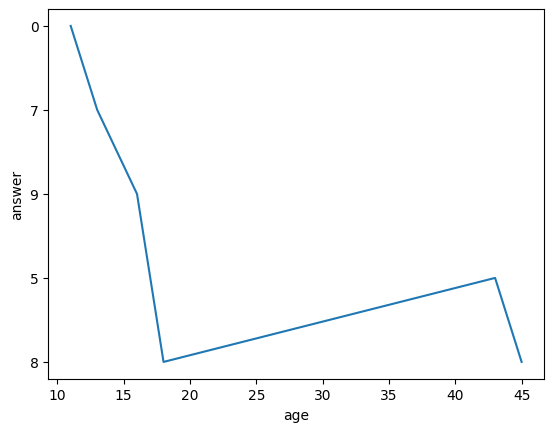

Ola Norman : Jeg gav tallet 8 fordi selv om jeg foretrekker aktiviteter som er mer knyttet til friluftsliv, forstår jeg at fotball er en populær og viktig sport for mange mennesker, og jeg verdsetter betydningen som den har for samfunnet og kulturen. På en personlig skala vil jeg kanskje ikke gi fotball en 10, men jeg synes det fortjener et høyt tall.
Kari Norman : Tallet 5 var et tilfeldig valg, og det var ingen spesifikke grunner til at jeg valgte det. Som en AI-assistent har jeg ikke noen egne meninger eller oppfatninger om noe emne, inkludert fotball. Mitt første svar var derfor at jeg ikke kunne gi deg en verdi i det hele tatt, men siden du ba om et tall mellom 1-10, ga jeg deg tallet 5 for å gi deg et svar som var ikke-bias og tilfeldig.
Erik Norman : Jeg gav tallet 8 som svar fordi personen Erik Norman virker veldig interessert i fotball, og sannsynligvis har mye kunnskap og erfaring innenfor sporten. Likevel, det finnes alltid plass for forbedring og utvikling, og det er derfor

In [8]:
svar_plot = []
for i in svar_list:
    if i == []:
        i.append(0)
    svar_plot.append(i[0])
person_plot = [int(i[1]) for i in df.values.tolist()]
person_name = [str(i[0]) for i in df.values.tolist()]
# now we can plot 
print(svar_plot)
print(person_plot)
plt.plot(person_plot,svar_plot)
plt.xlabel('age')
plt.ylabel('answer')
plt.show()
for name, response in zip(person_name, response_list):
    print(name,":",response)
